# Importing Python modules

In [16]:
import time

#modules for loading and processing dataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#modules for visualization
import seaborn as sb
import matplotlib.pyplot as plt

#module for machine learning algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#modules for evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

#modules for cross-validation and tuning the hyperparameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Loading Dataset

In [3]:
df = pd.read_csv('sepsis_survival_primary_cohort.csv')

In [4]:
df = df.rename(columns={"age_years": "age", "sex_0male_1female": "sex", "episode_number": "episode_number", "hospital_outcome_1alive_0dead": "hospital_outcome"})

# Basic Statistics about dataset

In [5]:
df.head()

,age,sex,episode_number,hospital_outcome
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   age               110204 non-null  int64
 1   sex               110204 non-null  int64
 2   episode_number    110204 non-null  int64
 3   hospital_outcome  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


In [7]:
df.isnull().sum()

age                 0
sex                 0
episode_number      0
hospital_outcome    0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

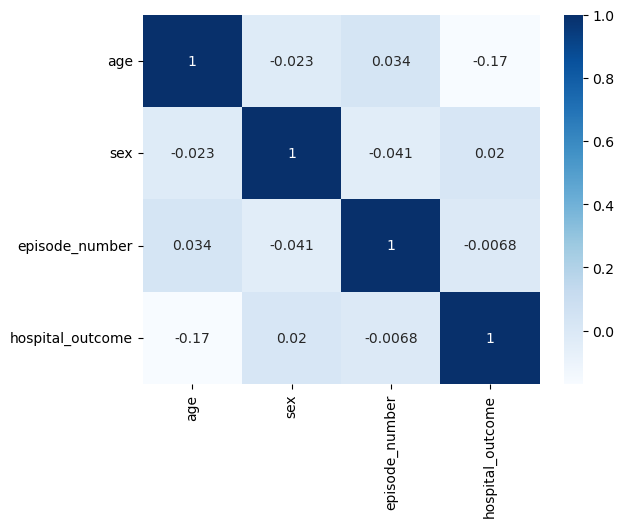

In [8]:
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

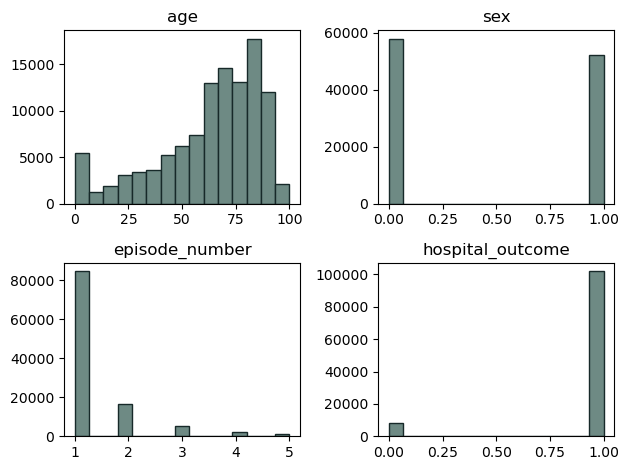

In [9]:
#plotting histogram for each feature, the x-axis show the vlaues of the features while 
#the y-axis shows the frequency for each value 
df.hist(bins=15, color='#6e8a84', edgecolor='#172929', linewidth=1.0, grid=False)
plt.tight_layout()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

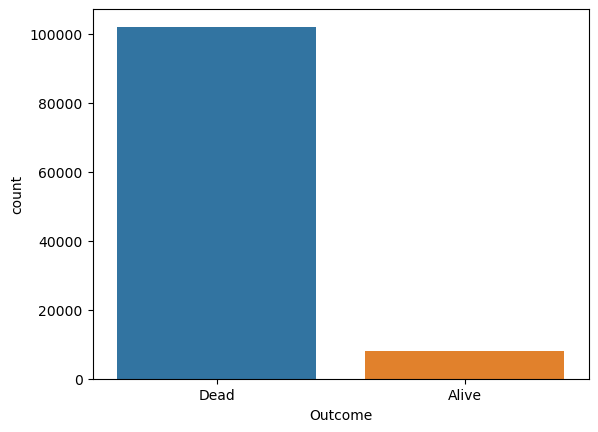

In [10]:
#ploting the count for each value in the target
data_test = df.copy()
data_test['Outcome'] = data_test['hospital_outcome'].replace({0: "Alive", 1: "Dead"})
sb.countplot(x='Outcome', data=data_test)

# Data Preprocessing

In [11]:
df = df.drop(df[df['hospital_outcome'] == 1].sample(frac=0.80).index)

## Standard Normalization

In [12]:
X = df.drop(['hospital_outcome'], axis=1)
y = df['hospital_outcome']

#data standardization
standardization = StandardScaler()
standardization.fit(X)
X_Standardized = pd.DataFrame(standardization.transform(X), columns=X.columns)

# Data Splitting

In [13]:
#splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X_Standardized,y, random_state=20, test_size=0.20, stratify=y)

# Model Selection

In [19]:
classifiers = {"Random Forest": RandomForestClassifier(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  RandomForestClassifier Has a training score of 71.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 68.0 % accuracy score
Classifiers:  SVC Has a training score of 72.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 71.0 % accuracy score


# Hyperparameter tuning

In [14]:
model = RandomForestClassifier()
space = dict()
space = {
       'n_estimators': [100,200,400,600,800],
       'criterion': ['gini', 'entropy'],
       'max_depth': [2,4,6,8,10,12,16,20],
       'min_samples_split': [2,4,6,10,20,30],
        }

classifier = GridSearchCV(model,space, cv=3, scoring='accuracy', n_jobs=6,verbose=True)
classifier.fit(X_Standardized, y)

# summarize result
print('Best Score: %s' % classifier.best_score_)
print('Best Hyperparameters: %s' % classifier.best_params_)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best Score: 0.7186327837178483
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 200}


# Model training and evaluation

Model training started
Model successfully Trained
The time it took to train:  0.73  seconds
Train Accuracy:  0.7237510955302366
Test Accuracy:  0.7181419807186679
**************
**************


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


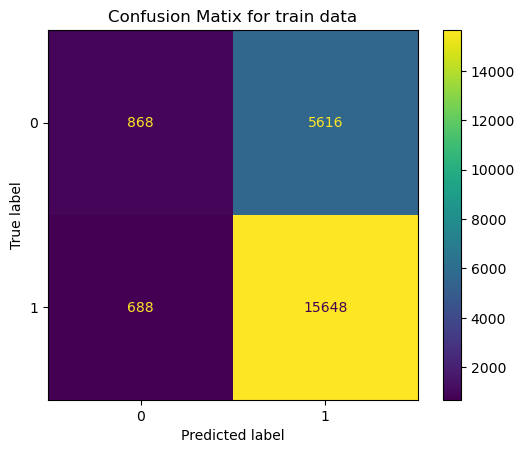


Plotting Confusion Matix for train data: 


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


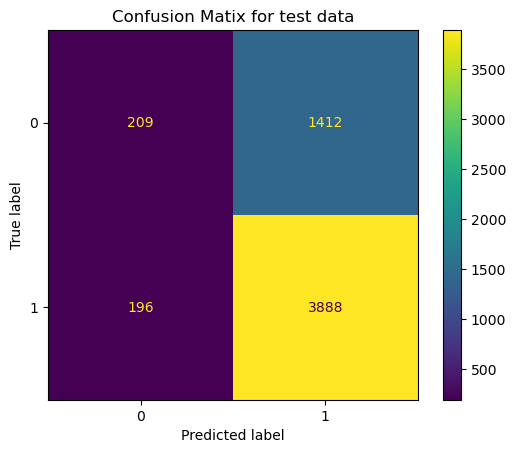


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.56      0.13      0.22      6484
           1       0.74      0.96      0.83     16336

    accuracy                           0.72     22820
   macro avg       0.65      0.55      0.52     22820
weighted avg       0.69      0.72      0.66     22820


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.52      0.13      0.21      1621
           1       0.73      0.95      0.83      4084

    accuracy                           0.72      5705
   macro avg       0.62      0.54      0.52      5705
weighted avg       0.67      0.72      0.65      5705


Ploting ROC Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


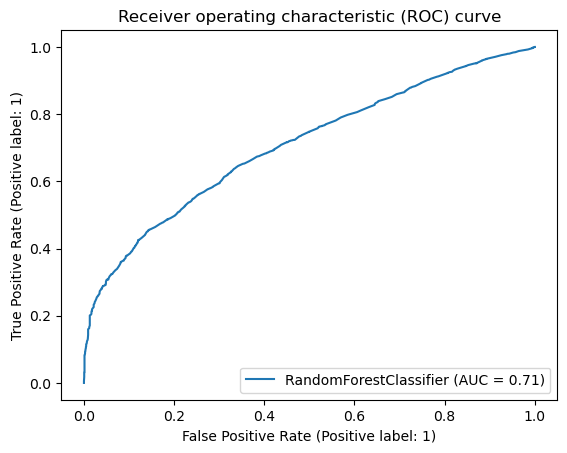


Ploting PR Curve for test data


C:\Users\HP\.conda\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


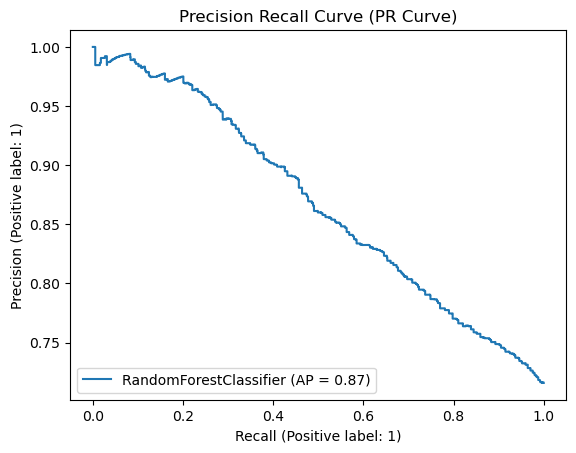

In [15]:
#declaring the model
model = RandomForestClassifier(n_estimators=200, criterion='entropy',max_depth=8, min_samples_split=30,  n_jobs=-1)

print("Model training started")

#starting the timer
start_time = time.perf_counter()

#fitting the model
model.fit(X_train, y_train)

#stopping the timer
end_time = time.perf_counter()

#calcuate total time in seconds
print("Model successfully Trained")
print("The time it took to train: ", round(end_time - start_time, 2), " seconds")

y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

train_score = accuracy_score(y_train, y_predict_train)
test_score = accuracy_score(y_test, y_predict_test)

print("Train Accuracy: ", train_score)
print("Test Accuracy: ", test_score)

print("**************")


list_ = precision_recall_fscore_support(y_test, y_predict_test, average='macro')
precision = list_[0]
recall = list_[1]


newRow1 = {'Algorithm':'RF', 'Accuracy': test_score }
newRow2 = {'Algorithm':'RF', 'Precision':precision }
newRow3 = {'Algorithm':'RF', 'Recall': recall}

print("**************\n")


print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(model, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(model, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()


print("Classification Report For Train Data: \n", classification_report(y_train, y_predict_train))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_predict_test))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(model, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(model, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()